Upload the basic notebook

In [1]:
%%capture
%run foundation_notebook.ipynb

In [2]:
print("Notebook run successfully!")

Notebook run successfully!


# 5. Anomaly detector - architecture

We build an example of convolutional autoencoder (CAE).

Upload the Tensorflow library

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Model
from tensorflow.keras import layers

Upload the suggested autoencoder architecture (class)

In [7]:
import importlib
# MODIFIED!!!!!!!!!!!!!!!!!
import Z_anomaly_detector_class_experimental_1  # Import the module first

importlib.reload(Z_anomaly_detector_class_experimental_1)  # Reload the module
from anomaly_detector_class import AnomalyDetector

Shuffle data actively - example

In [10]:
# reshape
norm_data_0_reshaped = norm_data_0.reshape(len(norm_data_0), n ,1)

# shuffle
indices_ex = np.random.permutation(norm_data_0_reshaped.shape[0])
X_ex = norm_data_0_reshaped[indices_ex]
X_ex.shape

(5000, 1024, 1)

Build an instance of the anomaly detector class and train it

In [12]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [14]:
autoencoder_example = AnomalyDetector(n)
autoencoder_example.compile(optimizer=optimizer, loss='mse')

# training
history_example = autoencoder_example.fit(norm_data_0_reshaped, norm_data_0_reshaped,
          epochs=3,
          batch_size=32,
          validation_split=0.2,
          shuffle=False)

C:\Users\Pavel\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 2/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - loss: 0.0222 - val_loss: 0.0219
Epoch 3/3
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0222 - val_loss: 0.0219


Encoder

In [16]:
autoencoder_example.encoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 1024, 32)       │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1024, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 512, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 512, 16)        │         2,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 256, 16)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 256, 8)         │           392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256, 8)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 128, 8)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 128, 4)         │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 64, 4)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,260 (12.73 KB)

 Trainable params: 3,260 (12.73 KB)

 Non-trainable params: 0 (0.00 B)

Decoder

In [18]:
autoencoder_example.decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_transpose                │ (32, 128, 4)           │            52 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (32, 128, 4)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_1              │ (32, 256, 8)           │           168 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (32, 256, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_2              │ (32, 512, 16)          │           656 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (32, 512, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_3              │ (32, 1024, 32)         │         2,592 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (32, 1024, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (32, 1024, 1)          │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,565 (13.93 KB)

 Trainable params: 3,565 (13.93 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
autoencoder_example.predict(norm_data_0_reshaped).shape

157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


(5000, 1024, 1)

# 6. Training data generation

In [21]:
# data without ULDM signal
size = 100000

### A. White noise, no NP

Data A1

In [73]:
start_time = time.time()

data_A1  = Nruns_noisydata_SNR_fixed(N = size, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 0)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 379.09345746040344 seconds


In [75]:
# we need to normalize it
scaler_A1 = MinMaxScaler()

# normalization
norm_data_A1   = scaler_A1.fit_transform(data_A1)

# reshape
norm_data_A1_reshaped = norm_data_A1.reshape(len(norm_data_A1), n ,1)

# shuffle
indices_A1 = np.random.permutation(norm_data_A1_reshaped.shape[0])
X_A1 = norm_data_A1_reshaped[indices_A1]
X_A1.shape

# delete what is not needed anymore
del data_A1, norm_data_A1, norm_data_A1_reshaped, indices_A1

Data A2

In [77]:
start_time = time.time()

data_A2  = Nruns_noisydata_SNR_fixed(N = size, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 0)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 352.70164036750793 seconds


In [78]:
# we need to normalize it
scaler_A2 = MinMaxScaler()

# normalization
norm_data_A2   = scaler_A2.fit_transform(data_A2)

# reshape
norm_data_A2_reshaped = norm_data_A2.reshape(len(norm_data_A2), n ,1)
norm_data_A2_reshaped.shape

# shuffle
indices_A2 = np.random.permutation(norm_data_A2_reshaped.shape[0])
X_A2 = norm_data_A2_reshaped[indices_A2]
X_A2.shape

# delete what is not needed anymore
del data_A2, norm_data_A2, norm_data_A2_reshaped, indices_A2

In [102]:
import pickle

# Save the scaler
with open('store/files/autoencoder/scaler_A1.pkl', 'wb') as f:
    pickle.dump(scaler_A1, f)

with open('store/files/autoencoder/scaler_A2.pkl', 'wb') as f:
    pickle.dump(scaler_A2, f)

# Save the data
with open('store/files/autoencoder/X_A1.pkl', 'wb') as f:
    pickle.dump(X_A1, f)

with open('store/files/autoencoder/X_A2.pkl', 'wb') as f:
    pickle.dump(X_A2, f)

In [692]:
del X_A1, X_A2

### B. White noise, NP incl.

Data B1

In [82]:
start_time = time.time()

data_B1  = Nruns_noisydata_SNR_fixed(N = size, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 1)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 432.98484325408936 seconds


In [83]:
# we need to normalize it
scaler_B1 = MinMaxScaler()

# normalization
norm_data_B1   = scaler_B1.fit_transform(data_B1)

# reshape
norm_data_B1_reshaped = norm_data_B1.reshape(len(norm_data_B1), n ,1)

# shuffle
indices_B1 = np.random.permutation(norm_data_B1_reshaped.shape[0])
X_B1 = norm_data_B1_reshaped[indices_B1]
X_B1.shape

# delete what is not needed anymore
del data_B1, norm_data_B1, norm_data_B1_reshaped, indices_B1

Data B2

In [84]:
start_time = time.time()

data_B2  = Nruns_noisydata_SNR_fixed(N = size, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 1)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 479.19052624702454 seconds


In [85]:
# we need to normalize it
scaler_B2 = MinMaxScaler()

# normalization
norm_data_B2   = scaler_B2.fit_transform(data_B2)

# reshape
norm_data_B2_reshaped = norm_data_B2.reshape(len(norm_data_B2), n ,1)

# shuffle
indices_B2 = np.random.permutation(norm_data_B2_reshaped.shape[0])
X_B2 = norm_data_B2_reshaped[indices_B2]
X_B2.shape

# delete what is not needed anymore
del data_B2, norm_data_B2, norm_data_B2_reshaped, indices_B2

In [104]:
import pickle

# Save the scaler
with open('store/files/autoencoder/scaler_B1.pkl', 'wb') as f:
    pickle.dump(scaler_B1, f)

with open('store/files/autoencoder/scaler_B2.pkl', 'wb') as f:
    pickle.dump(scaler_B2, f)

# Save the data
with open('store/files/autoencoder/X_B1.pkl', 'wb') as f:
    pickle.dump(X_B1, f)

with open('store/files/autoencoder/X_B2.pkl', 'wb') as f:
    pickle.dump(X_B2, f)

In [694]:
del X_B1, X_B2

### C. White and red noise, NP incl.

Data C1

In [86]:
start_time = time.time()

data_C1  = Nruns_noisydata_SNR_fixed(N = size, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "combined", nuis_control = 1)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 1110.8546204566956 seconds


In [87]:
# we need to normalize it
scaler_C1 = MinMaxScaler()

# normalization
norm_data_C1   = scaler_C1.fit_transform(data_C1)

# reshape
norm_data_C1_reshaped = norm_data_C1.reshape(len(norm_data_C1), n ,1)

# shuffle
indices_C1 = np.random.permutation(norm_data_C1_reshaped.shape[0])
X_C1 = norm_data_C1_reshaped[indices_C1]
X_C1.shape

# delete what is not needed anymore
del data_C1, norm_data_C1, norm_data_C1_reshaped, indices_C1

Data C2

In [88]:
start_time = time.time()

data_C2  = Nruns_noisydata_SNR_fixed(N = size, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "combined", nuis_control = 1)

end_time = time.time()

execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 840.4856753349304 seconds


In [89]:
# we need to normalize it
scaler_C2 = MinMaxScaler()

# normalization
norm_data_C2   = scaler_C2.fit_transform(data_C2)

# reshape
norm_data_C2_reshaped = norm_data_C2.reshape(len(norm_data_C2), n ,1)

# shuffle
indices_C2 = np.random.permutation(norm_data_C2_reshaped.shape[0])
X_C2 = norm_data_C2_reshaped[indices_C2]
X_C2.shape

# delete what is not needed anymore
del data_C2, norm_data_C2, norm_data_C2_reshaped, indices_C2

In [106]:
import pickle

# Save the scaler
with open('store/files/autoencoder/scaler_C1.pkl', 'wb') as f:
    pickle.dump(scaler_C1, f)

with open('store/files/autoencoder/scaler_C2.pkl', 'wb') as f:
    pickle.dump(scaler_C2, f)

# Save the data
with open('store/files/autoencoder/X_C1.pkl', 'wb') as f:
    pickle.dump(X_C1, f)

with open('store/files/autoencoder/X_C2.pkl', 'wb') as f:
    pickle.dump(X_C2, f)

In [696]:
del X_C1, X_C2

# 7. Training

### A1. 

Build an autoencoder

In [27]:
initial_learning_rate_A1 = 0.001
lr_schedule_A1 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_A1,
    decay_steps=5000,
    decay_rate=0.98,
    staircase=True)

In [29]:
# build a CAE
autoencoder_A1 = AnomalyDetector(n)
optimizer_A1 = tf.keras.optimizers.Adam(learning_rate=lr_schedule_A1)
autoencoder_A1.compile(optimizer=optimizer_A1, loss='mse')

Upload data

In [32]:
import pickle

with open('store/files/autoencoder/X_A1.pkl', 'rb') as f:  # Ensure the filename matches the uploaded file
    X_A1_uploaded = pickle.load(f)

Fit the data to the model

In [35]:
# training
start_time_trainA1 = time.time()

history_A1_round1 = autoencoder_A1.fit(X_A1_uploaded, X_A1_uploaded, epochs=8, batch_size=32, validation_split=0.2, shuffle=False)

end_time_trainA1 = time.time()
execution_time_trainA1 = end_time_trainA1 - start_time_trainA1
print(f"Execution time: {execution_time_trainA1} seconds")

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 118s 44ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 114s 46ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 114s 34ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 143s 57ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 185s 51ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 121s 42ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 93s 37ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 96s 38ms/step - loss: 0.0108 - val_loss: 0.0107
Execution time: 989.2938287258148 seconds


In [37]:
loss_A1     = history_A1_round1.history['loss']
val_loss_A1 = history_A1_round1.history['val_loss']

In [39]:
# Save weights
autoencoder_A1.save_weights('store/files/autoencoder_experimental/autoencoder_A1.weights.h5')

### A2. 

In [41]:
initial_learning_rate_A2 = 0.001
lr_schedule_A2 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_A2,
    decay_steps=5000,
    decay_rate=0.98,
    staircase=True)

In [43]:
# build a CAE
autoencoder_A2 = AnomalyDetector(n)
optimizer_A2 = tf.keras.optimizers.Adam(learning_rate=lr_schedule_A2)
autoencoder_A2.compile(optimizer=optimizer_A2, loss='mse')

In [45]:
import pickle

with open('store/files/autoencoder/X_A2.pkl', 'rb') as f:  # Ensure the filename matches the uploaded file
    X_A2_uploaded = pickle.load(f)

In [47]:
# training
start_time_trainA2 = time.time()

history_A2_round1 = autoencoder_A2.fit(X_A2_uploaded, X_A2_uploaded, epochs=8, batch_size=32, validation_split=0.2, shuffle=False)

end_time_trainA2 = time.time()
execution_time_trainA2 = end_time_trainA2 - start_time_trainA2
print(f"Execution time: {execution_time_trainA2} seconds")

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 32ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 35ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 91s 36ms/step - loss: 0.0108 - val_loss: 0.0107
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 99s 40ms/step - loss: 0.0107 - val_loss: 0.0107
Execution time: 757.9685270786285 seconds


In [48]:
loss_A2     = history_A2_round1.history['loss']
val_loss_A2 = history_A2_round1.history['val_loss']

In [49]:
# Save weights
autoencoder_A2.save_weights('store/files/autoencoder_experimental/autoencoder_A2.weights.h5')

In [50]:
import pandas as pd

df = pd.DataFrame({
    'loss_A1': loss_A1,
    'loss_A2': loss_A2,
    'val_loss_A1': val_loss_A1,
    'val_loss_A2': val_loss_A2,
})

df.to_csv('store/files/autoencoder_experimental/loss_vs_epoch_A.csv', index=False)

### B1. 

In [169]:
initial_learning_rate_B1 = 0.001
lr_schedule_B1 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_B1,
    decay_steps=5000,
    decay_rate=0.98,
    staircase=True)

In [171]:
# build a CAE
autoencoder_B1 = AnomalyDetector(n)
optimizer_B1 = tf.keras.optimizers.Adam(learning_rate=lr_schedule_B1)
autoencoder_B1.compile(optimizer=optimizer_B1, loss='mse')

C:\Users\Pavel\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [53]:
import pickle

with open('store/files/autoencoder/X_B1.pkl', 'rb') as f:  # Ensure the filename matches the uploaded file
    X_B1_uploaded = pickle.load(f)

In [173]:
# training
start_time_trainB1 = time.time()

history_B1_round1 = autoencoder_B1.fit(X_B1_uploaded, X_B1_uploaded, epochs=8, batch_size=32, validation_split=0.2, shuffle=False)

end_time_trainB1 = time.time()
execution_time_trainB1 = end_time_trainB1 - start_time_trainB1
print(f"Execution time: {execution_time_trainB1} seconds")

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 120s 44ms/step - loss: 0.0102 - val_loss: 0.0078
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 123s 49ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 109s 43ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 101s 40ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 88s 35ms/step - loss: 0.0067 - val_loss: 0.0064
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 100s 40ms/step - loss: 0.0064 - val_loss: 0.0063
Execution time: 836.7794907093048 seconds


In [179]:
loss_B1     = history_B1_round1.history['loss']
val_loss_B1 = history_B1_round1.history['val_loss']

In [181]:
# Save weights
autoencoder_B1.save_weights('store/files/autoencoder_experimental/autoencoder_B1_run2.weights.h5')

### B2. 

In [64]:
initial_learning_rate_B2 = 0.001
lr_schedule_B2 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_B2,
    decay_steps=5000,
    decay_rate=0.98,
    staircase=True)

In [65]:
# build a CAE
autoencoder_B2 = AnomalyDetector(n)
optimizer_B2 = tf.keras.optimizers.Adam(learning_rate=lr_schedule_B2)
autoencoder_B2.compile(optimizer=optimizer_B2, loss='mse')

C:\Users\Pavel\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [66]:
import pickle

with open('store/files/autoencoder/X_B2.pkl', 'rb') as f:  # Ensure the filename matches the uploaded file
    X_B2_uploaded = pickle.load(f)

In [67]:
# training
start_time_trainB2 = time.time()

history_B2_round1 = autoencoder_B2.fit(X_B2_uploaded, X_B2_uploaded, epochs=8, batch_size=32, validation_split=0.2, shuffle=False)

end_time_trainB2 = time.time()
execution_time_trainB2 = end_time_trainB2 - start_time_trainB2
print(f"Execution time: {execution_time_trainB2} seconds")

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 107s 39ms/step - loss: 0.0090 - val_loss: 0.0078
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 134s 36ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 141s 35ms/step - loss: 0.0077 - val_loss: 0.0077
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 96s 38ms/step - loss: 0.0076 - val_loss: 0.0074
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 98s 39ms/step - loss: 0.0069 - val_loss: 0.0064
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 91s 36ms/step - loss: 0.0064 - val_loss: 0.0063
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - loss: 0.0063 - val_loss: 0.0062
Execution time: 899.3185813426971 seconds


In [68]:
loss_B2     = history_B2_round1.history['loss']
val_loss_B2 = history_B2_round1.history['val_loss']

In [69]:
# Save weights
autoencoder_B2.save_weights('store/files/autoencoder_experimental/autoencoder_B2.weights.h5')

In [183]:
import pandas as pd

df = pd.DataFrame({
    'loss_B1': loss_B1,
    'loss_B2': loss_B2,
    'val_loss_B1': val_loss_B1,
    'val_loss_B2': val_loss_B2,
})

df.to_csv('store/files/autoencoder_experimental/loss_vs_epoch_B_run2.csv', index=False)

### C1. 

In [77]:
initial_learning_rate_C1 = 0.001
lr_schedule_C1 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_C1,
    decay_steps=5000,
    decay_rate=0.98,
    staircase=True)

In [78]:
# build a CAE
autoencoder_C1 = AnomalyDetector(n)
optimizer_C1 = tf.keras.optimizers.Adam(learning_rate = lr_schedule_C1)
autoencoder_C1.compile(optimizer=optimizer_C1, loss='mse')

C:\Users\Pavel\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [81]:
import pickle

with open('store/files/autoencoder/X_C1.pkl', 'rb') as f:  # Ensure the filename matches the uploaded file
    X_C1_uploaded = pickle.load(f)

In [83]:
# training
start_time_trainC1 = time.time()

history_C1_round1 = autoencoder_C1.fit(X_C1_uploaded, X_C1_uploaded, epochs=8, batch_size=32, validation_split=0.2, shuffle=False)

end_time_trainC1 = time.time()
execution_time_trainC1 = end_time_trainC1 - start_time_trainC1
print(f"Execution time: {execution_time_trainC1} seconds")

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 106s 38ms/step - loss: 0.0070 - val_loss: 0.0055
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 91s 36ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 102s 41ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 131s 36ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 91s 36ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 92s 37ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 89s 36ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 149s 38ms/step - loss: 0.0041 - val_loss: 0.0041
Execution time: 853.5930173397064 seconds


In [84]:
loss_C1     = history_C1_round1.history['loss']
val_loss_C1 = history_C1_round1.history['val_loss']

In [85]:
# Save weights
autoencoder_C1.save_weights('store/files/autoencoder_experimental/autoencoder_C1.weights.h5')

### C2. 

In [86]:
initial_learning_rate_C2 = 0.001
lr_schedule_C2 = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate_C2,
    decay_steps=5000,
    decay_rate=0.98,
    staircase=True)

In [87]:
# build a CAE
autoencoder_C2 = AnomalyDetector(n)
optimizer_C2 = tf.keras.optimizers.Adam(learning_rate = lr_schedule_C2)
autoencoder_C2.compile(optimizer=optimizer_C2, loss='mse')

C:\Users\Pavel\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [88]:
import pickle

with open('store/files/autoencoder/X_C2.pkl', 'rb') as f:  # Ensure the filename matches the uploaded file
    X_C2_uploaded = pickle.load(f)

In [89]:
# training
start_time_trainC2 = time.time()

history_C2_round1 = autoencoder_C2.fit(X_C2_uploaded, X_C2_uploaded, epochs=8, batch_size=32, validation_split=0.2, shuffle=False)

end_time_trainC2 = time.time()
execution_time_trainC2 = end_time_trainC2 - start_time_trainC2
print(f"Execution time: {execution_time_trainC2} seconds")

Epoch 1/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 136s 43ms/step - loss: 0.0069 - val_loss: 0.0055
Epoch 2/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 102s 41ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 3/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - loss: 0.0053 - val_loss: 0.0046
Epoch 4/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 76s 30ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 5/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 6/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 74s 29ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 7/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 73s 29ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 8/8
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 71s 29ms/step - loss: 0.0041 - val_loss: 0.0041
Execution time: 690.5479578971863 seconds


In [90]:
loss_C2     = history_C2_round1.history['loss']
val_loss_C2 = history_C2_round1.history['val_loss']

In [91]:
# Save weights
autoencoder_C2.save_weights('store/files/autoencoder_experimental/autoencoder_C2.weights.h5')

In [92]:
import pandas as pd

df = pd.DataFrame({
    'loss_C1': loss_C1,
    'loss_C2': loss_C2,
    'val_loss_C1': val_loss_C1,
    'val_loss_C2': val_loss_C2,
})

df.to_csv('store/files/autoencoder_experimental/loss_vs_epoch_C.csv', index=False)

# 8. Evaluation - Part 1

### 8.1 Upload weights, scalers and loss vs epochs

In [103]:
import pickle, pandas as pd

In [105]:
dummy_input          = Nruns_noisydata_SNR_fixed(N = 1, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 0)
dummy_input_reshaped = dummy_input.reshape(len(dummy_input), n ,1)
dummy_input_reshaped.shape

(1, 1024, 1)

Create autoencoder instance and upload weights

In [185]:
autoencoder_A1_uploaded = AnomalyDetector(n)
autoencoder_A1_uploaded(dummy_input_reshaped)
autoencoder_A1_uploaded.load_weights('store/files/autoencoder_experimental/autoencoder_A1.weights.h5')

autoencoder_A2_uploaded = AnomalyDetector(n)
autoencoder_A2_uploaded(dummy_input_reshaped)
autoencoder_A2_uploaded.load_weights('store/files/autoencoder_experimental/autoencoder_A2.weights.h5')

autoencoder_B1_uploaded = AnomalyDetector(n)
autoencoder_B1_uploaded(dummy_input_reshaped)
autoencoder_B1_uploaded.load_weights('store/files/autoencoder_experimental/autoencoder_B1_run2.weights.h5')

autoencoder_B2_uploaded = AnomalyDetector(n)
autoencoder_B2_uploaded(dummy_input_reshaped)
autoencoder_B2_uploaded.load_weights('store/files/autoencoder_experimental/autoencoder_B2.weights.h5')

autoencoder_C1_uploaded = AnomalyDetector(n)
autoencoder_C1_uploaded(dummy_input_reshaped)
autoencoder_C1_uploaded.load_weights('store/files/autoencoder_experimental/autoencoder_C1.weights.h5')

autoencoder_C2_uploaded = AnomalyDetector(n)
autoencoder_C2_uploaded(dummy_input_reshaped)
autoencoder_C2_uploaded.load_weights('store/files/autoencoder_experimental/autoencoder_C2.weights.h5')

C:\Users\Pavel\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Upload scalers

In [109]:
with open('store/files/autoencoder/scaler_A1.pkl', 'rb') as file:
    scaler_A1_uploaded = pickle.load(file)

with open('store/files/autoencoder/scaler_A2.pkl', 'rb') as file:
    scaler_A2_uploaded = pickle.load(file)

with open('store/files/autoencoder/scaler_B1.pkl', 'rb') as file:
    scaler_B1_uploaded = pickle.load(file)

with open('store/files/autoencoder/scaler_B2.pkl', 'rb') as file:
    scaler_B2_uploaded = pickle.load(file)

with open('store/files/autoencoder/scaler_C1.pkl', 'rb') as file:
    scaler_C1_uploaded = pickle.load(file)

with open('store/files/autoencoder/scaler_C2.pkl', 'rb') as file:
    scaler_C2_uploaded = pickle.load(file)

Upload losses

In [187]:
df_A = pd.read_csv('store/files/autoencoder_experimental/loss_vs_epoch_A.csv')

loss_A1_uploaded     = df_A['loss_A1']
loss_A2_uploaded     = df_A['loss_A2']
val_loss_A1_uploaded = df_A['val_loss_A1']
val_loss_A2_uploaded = df_A['val_loss_A2']

df_B = pd.read_csv('store/files/autoencoder_experimental/loss_vs_epoch_B_run2.csv')

loss_B1_uploaded     = df_B['loss_B1']
loss_B2_uploaded     = df_B['loss_B2']
val_loss_B1_uploaded = df_B['val_loss_B1']
val_loss_B2_uploaded = df_B['val_loss_B2']

df_C = pd.read_csv('store/files/autoencoder_experimental/loss_vs_epoch_C.csv')

loss_C1_uploaded     = df_C['loss_C1']
loss_C2_uploaded     = df_C['loss_C2']
val_loss_C1_uploaded = df_C['val_loss_C1']
val_loss_C2_uploaded = df_C['val_loss_C2']

Plot losses vs epoches

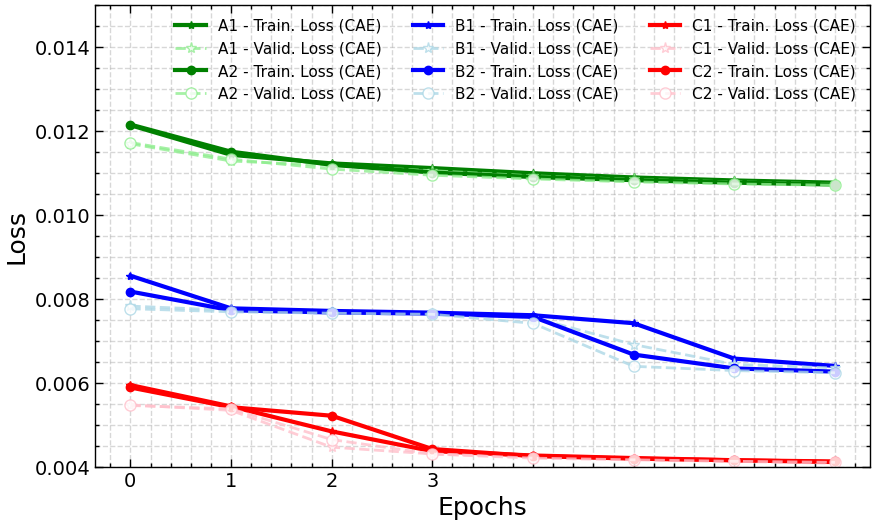

In [189]:
plt.figure(figsize=(10, 6))

plt.plot(loss_A1_uploaded, "-*", color="green", linewidth=3, label=r"A1 - Train. Loss (CAE)")
plt.plot(val_loss_A1_uploaded, "--*", color="lightgreen", markersize=8, label="A1 - Valid. Loss (CAE)", markerfacecolor='white', alpha=0.8)
plt.plot(loss_A2_uploaded, "-o", color="green", linewidth=3, label=r"A2 - Train. Loss (CAE)")
plt.plot(val_loss_A2_uploaded, "--o", color="lightgreen", markersize=8, label="A2 - Valid. Loss (CAE)", markerfacecolor='white', alpha=0.8)

plt.plot(loss_B1_uploaded, "-*", color="blue", linewidth=3, label=r"B1 - Train. Loss (CAE)")
plt.plot(val_loss_B1_uploaded, "--*", color="lightblue", markersize=8, label="B1 - Valid. Loss (CAE)", markerfacecolor='white', alpha=0.8)
plt.plot(loss_B2_uploaded, "-o", color="blue", linewidth=3, label=r"B2 - Train. Loss (CAE)")
plt.plot(val_loss_B2_uploaded, "--o", color="lightblue", markersize=8, label="B2 - Valid. Loss (CAE)", markerfacecolor='white', alpha=0.8)

plt.plot(loss_C1_uploaded, "-*", color="red", linewidth=3, label=r"C1 - Train. Loss (CAE)")
plt.plot(val_loss_C1_uploaded, "--*", color="pink", markersize=8, label="C1 - Valid. Loss (CAE)", markerfacecolor='white', alpha=0.8)
plt.plot(loss_C2_uploaded, "-o", color="red", linewidth=3, label=r"C2 - Train. Loss (CAE)")
plt.plot(val_loss_C2_uploaded, "--o", color="pink", markersize=8, label="C2 - Valid. Loss (CAE)", markerfacecolor='white', alpha=0.8)

plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.ylim(0.004,0.015)

plt.ylabel("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=18)

plt.xticks([0, 1, 2, 3], fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=11, loc='upper right', ncol = 3)

plt.savefig("store/plots/autoencoder_experimental/loss_vs_epochs_run2.png")

plt.show()

### 8.2 Reconstrution error distribution - for normal datasets

Raw data

In [115]:
# raw data
data_A1 = Nruns_noisydata_SNR_fixed(N = 5000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 0)
data_A2 = Nruns_noisydata_SNR_fixed(N = 5000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 0)

data_B1 = Nruns_noisydata_SNR_fixed(N = 5000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 1)
data_B2 = Nruns_noisydata_SNR_fixed(N = 5000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 1)

data_C1 = Nruns_noisydata_SNR_fixed(N = 5000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "combined", nuis_control = 1)
data_C2 = Nruns_noisydata_SNR_fixed(N = 5000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "combined", nuis_control = 1)

In [191]:
data_B1 = Nruns_noisydata_SNR_fixed(N = 5000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 0, spin = "s0l", noise_model = "white", nuis_control = 1)

Normalization - A1

In [116]:
# normalisation
norm_data_A1 = scaler_A1_uploaded.transform(data_A1)

# reshape
X_A1_example = norm_data_A1.reshape(len(norm_data_A1), n ,1)

# prediction
reconstructions_A1 = autoencoder_A1_uploaded.predict(X_A1_example)

# loss
losses_A1_example = tf.keras.losses.mse(reconstructions_A1.reshape(len(X_A1_example),n), X_A1_example.reshape(len(X_A1_example),n))

# sorted loss
losses_A1_example_sorted = sorted(list(losses_A1_example.numpy()))

# 99% percentil
ind_A1 = int(len(losses_A1_example) * 0.99)

# threshold
threshold_A1 = losses_A1_example_sorted[ind_A1]

# check the threshold
print( round(100 * sum(losses_A1_example.numpy() <= threshold_A1) / len(losses_A1_example_sorted)), "%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
99 %


Normalization - A2

In [117]:
# normalisation
norm_data_A2 = scaler_A2_uploaded.transform(data_A2)

# reshape
X_A2_example = norm_data_A2.reshape(len(norm_data_A2), n ,1)

# prediction
reconstructions_A2 = autoencoder_A2_uploaded.predict(X_A2_example)

# loss
losses_A2_example = tf.keras.losses.mse(reconstructions_A2.reshape(len(X_A2_example),n), X_A2_example.reshape(len(X_A2_example),n))

# sorted loss
losses_A2_example_sorted = sorted(list(losses_A2_example.numpy()))

# 99% percentil
ind_A2 = int(len(losses_A2_example) * 0.99)

# threshold
threshold_A2 = losses_A2_example_sorted[ind_A2]

# check the threshold
print( round(100 * sum(losses_A2_example.numpy() <= threshold_A2) / len(losses_A2_example_sorted)), "%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
99 %


Normalization - B1

In [193]:
# normalisation
norm_data_B1 = scaler_B1_uploaded.transform(data_B1)

# reshape
X_B1_example = norm_data_B1.reshape(len(norm_data_B1), n ,1)

# prediction
reconstructions_B1 = autoencoder_B1_uploaded.predict(X_B1_example)

# loss
losses_B1_example = tf.keras.losses.mse(reconstructions_B1.reshape(len(X_B1_example),n), X_B1_example.reshape(len(X_B1_example),n))

# sorted loss
losses_B1_example_sorted = sorted(list(losses_B1_example.numpy()))

# 99% percentil
ind_B1 = int(len(losses_B1_example) * 0.99)

# threshold
threshold_B1 = losses_B1_example_sorted[ind_B1]

# check the threshold
print( round(100 * sum(losses_B1_example.numpy() <= threshold_B1) / len(losses_B1_example_sorted)), "%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step
99 %


Normalization - B2

In [121]:
# normalisation
norm_data_B2 = scaler_B2_uploaded.transform(data_B2)

# reshape
X_B2_example = norm_data_B2.reshape(len(norm_data_B2), n ,1)

# prediction
reconstructions_B2 = autoencoder_B2_uploaded.predict(X_B2_example)

# loss
losses_B2_example = tf.keras.losses.mse(reconstructions_B2.reshape(len(X_B2_example),n), X_B2_example.reshape(len(X_B2_example),n))

# sorted loss
losses_B2_example_sorted = sorted(list(losses_B2_example.numpy()))

# 99% percentil
ind_B2 = int(len(losses_B2_example) * 0.99)

# threshold
threshold_B2 = losses_B2_example_sorted[ind_B2]

# check the threshold
print( round(100 * sum(losses_B2_example.numpy() <= threshold_B2) / len(losses_B2_example_sorted)), "%")


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step
99 %


Normalization - C1

In [123]:
# normalisation
norm_data_C1 = scaler_C1_uploaded.transform(data_C1)

# reshape
X_C1_example = norm_data_C1.reshape(len(norm_data_C1), n ,1)

# prediction
reconstructions_C1 = autoencoder_C1_uploaded.predict(X_C1_example)

# loss
losses_C1_example = tf.keras.losses.mse(reconstructions_C1.reshape(len(X_C1_example),n), X_C1_example.reshape(len(X_C1_example),n))

# sorted loss
losses_C1_example_sorted = sorted(list(losses_C1_example.numpy()))

# 99% percentil
ind_C1 = int(len(losses_C1_example) * 0.99)

# threshold
threshold_C1 = losses_C1_example_sorted[ind_C1]

# check the threshold
print( round(100 * sum(losses_C1_example.numpy() <= threshold_C1) / len(losses_C1_example_sorted)), "%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
99 %


Normalization - C2

In [125]:
# normalisation
norm_data_C2 = scaler_C2_uploaded.transform(data_C2)

# reshape
X_C2_example = norm_data_C2.reshape(len(norm_data_C2), n ,1)

# prediction
reconstructions_C2 = autoencoder_C2_uploaded.predict(X_C2_example)

# loss
losses_C2_example = tf.keras.losses.mse(reconstructions_C2.reshape(len(X_C2_example),n), X_C2_example.reshape(len(X_C2_example),n))

# sorted loss
losses_C2_example_sorted = sorted(list(losses_C2_example.numpy()))

# 99% percentil
ind_C2 = int(len(losses_C2_example) * 0.99)

# threshold
threshold_C2 = losses_C2_example_sorted[ind_C2]

# check the threshold
print( round(100 * sum(losses_C2_example.numpy() <= threshold_C2) / len(losses_C2_example_sorted)), "%")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
99 %


Plot reconstrution error distributions

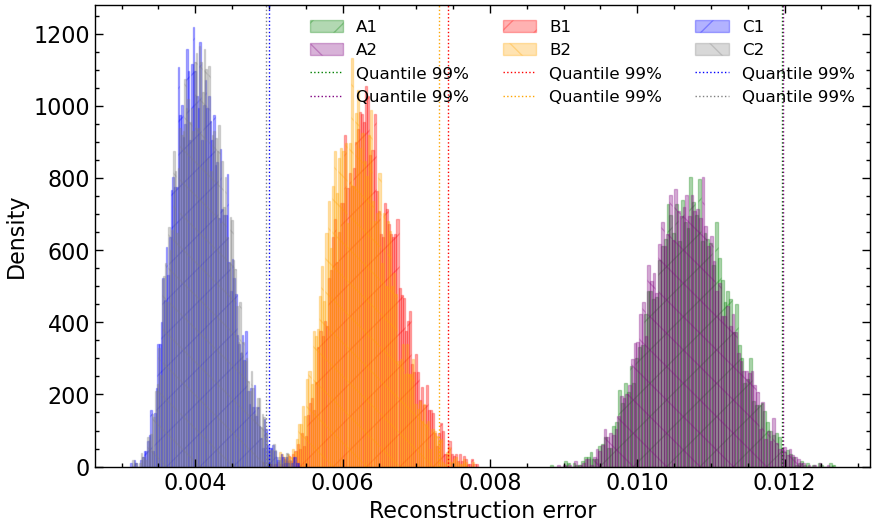

In [195]:
plt.figure(figsize = (10, 6))

plt.hist(losses_A1_example.numpy(), color = "green", bins=100, density = True, label = "A1", alpha = 0.3, edgecolor = 'green', hatch='/')
plt.hist(losses_A2_example.numpy(), color = "purple", bins=100, density = True, label = "A2",  alpha = 0.3, edgecolor = 'purple', hatch='\\')
plt.axvline(x=threshold_A1, color='green', linestyle=':', linewidth=1, label="Quantile 99%")
plt.axvline(x=threshold_A2, color='purple', linestyle=':', linewidth=1, label="Quantile 99%")

plt.hist(losses_B1_example.numpy(), color = "red", bins=100, density = True, label = "B1", alpha = 0.3, edgecolor = 'red', hatch='/')
plt.hist(losses_B2_example.numpy(), color = "orange", bins=100, density = True, label = "B2",  alpha = 0.3, edgecolor = 'orange', hatch='\\')
plt.axvline(x=threshold_B1, color='red', linestyle=':', linewidth=1, label="Quantile 99%")
plt.axvline(x=threshold_B2, color='orange', linestyle=':', linewidth=1, label="Quantile 99%")

plt.hist(losses_C1_example.numpy(), color = "blue", bins=100, density = True, label = "C1", alpha = 0.3, edgecolor = 'blue', hatch='/')
plt.hist(losses_C2_example.numpy(), color = "grey", bins=100, density = True, label = "C2", alpha = 0.3, edgecolor = 'grey', hatch='\\')
plt.axvline(x=threshold_C1, color='blue', linestyle=':', linewidth=1, label="Quantile 99%")
plt.axvline(x=threshold_C2, color='grey', linestyle=':', linewidth=1, label="Quantile 99%")

plt.xlabel("Reconstruction error")
plt.ylabel("Density")
plt.legend(loc = 'upper right', ncol = 3, fontsize = 12)

plt.savefig("store/plots/autoencoder_experimental/loss_distributions_run2.png")

plt.show()

Thresholds

In [197]:
import pandas as pd

df = pd.DataFrame({
    'threshold_A1': [threshold_A1],
    'threshold_A2': [threshold_A2],
    'threshold_B1': [threshold_B1],
    'threshold_B2': [threshold_B2],
    'threshold_C1': [threshold_C1],
    'threshold_C2': [threshold_C2],
})

df.to_csv('store/files/autoencoder_experimental/thresholds_ABC_run2.csv', index=False)

data = {
    'losses_A1_example': losses_A1_example.numpy(),
    'losses_A2_example': losses_A2_example.numpy(),
    'losses_B1_example': losses_B1_example.numpy(),
    'losses_B2_example': losses_B2_example.numpy(),
    'losses_C1_example': losses_C1_example.numpy(),
    'losses_C2_example': losses_C2_example.numpy()
}

# Save to a pickle file
with open('store/files/autoencoder_experimental/loss_distributions_ABC_run2.pkl', 'wb') as f:
    pickle.dump(data, f)

### 8.3 Reconstrution error distribution - for abnormal datasets, type A

Sequence of distributions for various $S$, for spin 0L

In [139]:
# compute losses
data_s0l_S10_A               = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 10, spin = "s0l",  noise_model = "white", nuis_control = 0)
norm_data_s0l_S10_A          = scaler_A1_uploaded.transform(data_s0l_S10_A)
norm_data_s0l_S10_A_reshaped = norm_data_s0l_S10_A.reshape(3000, n ,1)

reconstructions_s0l_S10_A    = autoencoder_A1_uploaded.predict(norm_data_s0l_S10_A_reshaped, verbose = 0)
loss_s0l_S10_A               = tf.keras.losses.mse(reconstructions_s0l_S10_A.reshape(3000,n), norm_data_s0l_S10_A_reshaped.reshape(3000,n)).numpy()

In [140]:
# compute losses
data_s0l_S20_A               = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 20, spin = "s0l",  noise_model = "white", nuis_control = 0)
norm_data_s0l_S20_A          = scaler_A1_uploaded.transform(data_s0l_S20_A)
norm_data_s0l_S20_A_reshaped = norm_data_s0l_S20_A.reshape(3000, n ,1)

reconstructions_s0l_S20_A    = autoencoder_A1_uploaded.predict(norm_data_s0l_S20_A_reshaped, verbose = 0)
loss_s0l_S20_A               = tf.keras.losses.mse(reconstructions_s0l_S20_A.reshape(3000,n), norm_data_s0l_S20_A_reshaped.reshape(3000,n)).numpy()

In [141]:
# compute losses
data_s0l_S30_A               = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 30, spin = "s0l",  noise_model = "white", nuis_control = 0)
norm_data_s0l_S30_A          = scaler_A1_uploaded.transform(data_s0l_S30_A)
norm_data_s0l_S30_A_reshaped = norm_data_s0l_S30_A.reshape(3000, n ,1)

reconstructions_s0l_S30_A    = autoencoder_A1_uploaded.predict(norm_data_s0l_S30_A_reshaped, verbose = 0)
loss_s0l_S30_A               = tf.keras.losses.mse(reconstructions_s0l_S30_A.reshape(3000,n), norm_data_s0l_S30_A_reshaped.reshape(3000,n)).numpy()

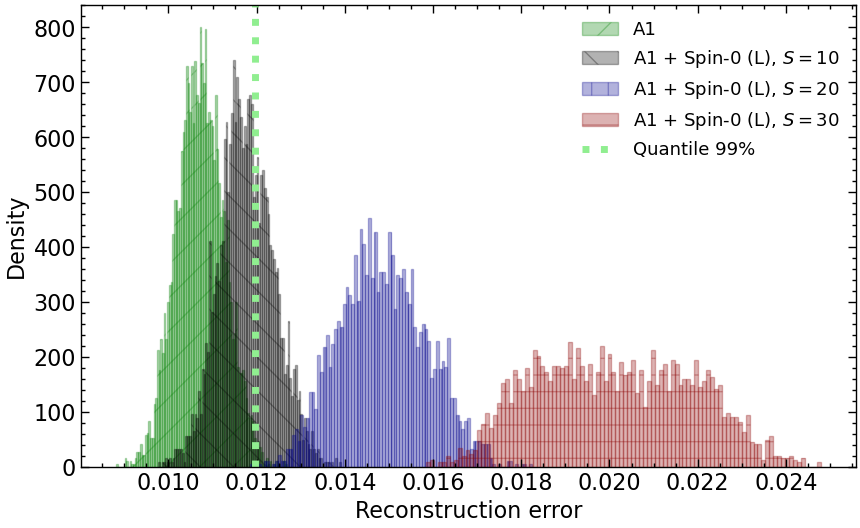

In [147]:
data = {
    'losses_A1_example': losses_A1_example.numpy(),
    'loss_s0l_S10_A': loss_s0l_S10_A,
    'loss_s0l_S20_A': loss_s0l_S20_A,
    'loss_s0l_S30_A': loss_s0l_S30_A
}

# Save to a pickle file
with open('store/files/autoencoder_experimental/loss_distributions_spin0L_A.pkl', 'wb') as f:
    pickle.dump(data, f)

### 8.4 Reconstrution error distribution - for abnormal datasets, type C

1. Sequence of distributions for various $S$, for spin 0L

In [149]:
# compute losses
data_s0l_S10_C1               = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 10, spin = "s0l",  noise_model = "combined", nuis_control = 1)
norm_data_s0l_S10_C1          = scaler_C1_uploaded.transform(data_s0l_S10_C1)
norm_data_s0l_S10_C1_reshaped = norm_data_s0l_S10_C1.reshape(3000, n ,1)

reconstructions_s0l_S10_C1    = autoencoder_C1_uploaded.predict(norm_data_s0l_S10_C1_reshaped, verbose = 0)
loss_s0l_S10_C1               = tf.keras.losses.mse(reconstructions_s0l_S10_C1.reshape(3000,n), norm_data_s0l_S10_C1_reshaped.reshape(3000,n)).numpy()

In [150]:
# compute losses
data_s0l_S25_C1               = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 25, spin = "s0l",  noise_model = "combined", nuis_control = 1)
norm_data_s0l_S25_C1          = scaler_C1_uploaded.transform(data_s0l_S25_C1)
norm_data_s0l_S25_C1_reshaped = norm_data_s0l_S25_C1.reshape(3000, n ,1)

reconstructions_s0l_S25_C1    = autoencoder_C1_uploaded.predict(norm_data_s0l_S25_C1_reshaped, verbose = 0)
loss_s0l_S25_C1               = tf.keras.losses.mse(reconstructions_s0l_S25_C1.reshape(3000,n), norm_data_s0l_S25_C1_reshaped.reshape(3000,n)).numpy()

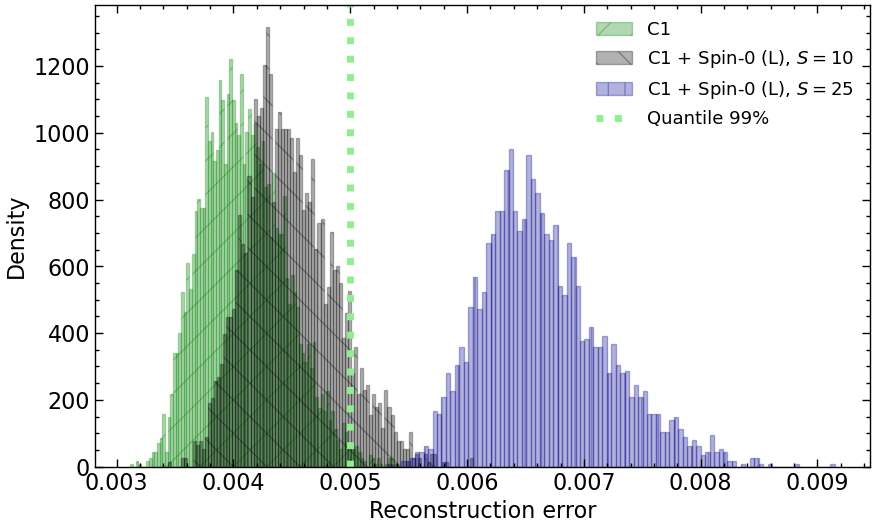

In [155]:
data = {
    'losses_C1_example': losses_C1_example.numpy(),
    'loss_s0l_S10_C1': loss_s0l_S10_C1,
    'loss_s0l_S25_C1': loss_s0l_S25_C1,
}

# Save to a pickle file
with open('store/files/autoencoder_experimental/loss_distributions_spin0L_C.pkl', 'wb') as f:
    pickle.dump(data, f)

2. Sequence of distributions with fixed $S$, different ULDM models

In [157]:
# compute losses
data_s0l_S20_C = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 20, spin = "s0l",  noise_model = "combined", nuis_control = 1)
norm_data_s0l_S20_C  = scaler_C1_uploaded.transform(data_s0l_S20_C)
norm_data_s0l_S20_C_reshaped = norm_data_s0l_S20_C.reshape(3000, n ,1)

reconstructions_s0l_S20_C  = autoencoder_C1_uploaded.predict(norm_data_s0l_S20_C_reshaped, verbose = 0)
loss_s0l_S20_C  = tf.keras.losses.mse(reconstructions_s0l_S20_C.reshape(3000,n), norm_data_s0l_S20_C_reshaped.reshape(3000,n)).numpy()

In [158]:
# compute losses
data_s0q_S20_C = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 20, spin = "s0q",  noise_model = "combined", nuis_control = 1)
norm_data_s0q_S20_C  = scaler_C1_uploaded.transform(data_s0q_S20_C)
norm_data_s0q_S20_C_reshaped = norm_data_s0q_S20_C.reshape(3000, n ,1)

reconstructions_s0q_S20_C  = autoencoder_C1_uploaded.predict(norm_data_s0q_S20_C_reshaped, verbose = 0)
loss_s0q_S20_C  = tf.keras.losses.mse(reconstructions_s0q_S20_C.reshape(3000,n), norm_data_s0q_S20_C_reshaped.reshape(3000,n)).numpy()

In [159]:
# compute losses
data_s1_S20_C = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 20, spin = "s1",  noise_model = "combined", nuis_control = 1)
norm_data_s1_S20_C  = scaler_C1_uploaded.transform(data_s1_S20_C)
norm_data_s1_S20_C_reshaped = norm_data_s1_S20_C.reshape(3000, n ,1)

reconstructions_s1_S20_C  = autoencoder_C1_uploaded.predict(norm_data_s1_S20_C_reshaped, verbose = 0)
loss_s1_S20_C  = tf.keras.losses.mse(reconstructions_s1_S20_C.reshape(3000,n), norm_data_s1_S20_C_reshaped.reshape(3000,n)).numpy()

In [160]:
# compute losses
data_s2_S20_C = Nruns_noisydata_SNR_fixed(N = 3000, m_list = [1e-20 * u.eV , 1e-20 * u.eV], snr = 20, spin = "s2",  noise_model = "combined", nuis_control = 1)
norm_data_s2_S20_C  = scaler_C1_uploaded.transform(data_s2_S20_C)
norm_data_s2_S20_C_reshaped = norm_data_s2_S20_C.reshape(3000, n ,1)

reconstructions_s2_S20_C  = autoencoder_C1_uploaded.predict(norm_data_s2_S20_C_reshaped, verbose = 0)
loss_s2_S20_C  = tf.keras.losses.mse(reconstructions_s2_S20_C.reshape(3000,n), norm_data_s2_S20_C_reshaped.reshape(3000,n)).numpy()

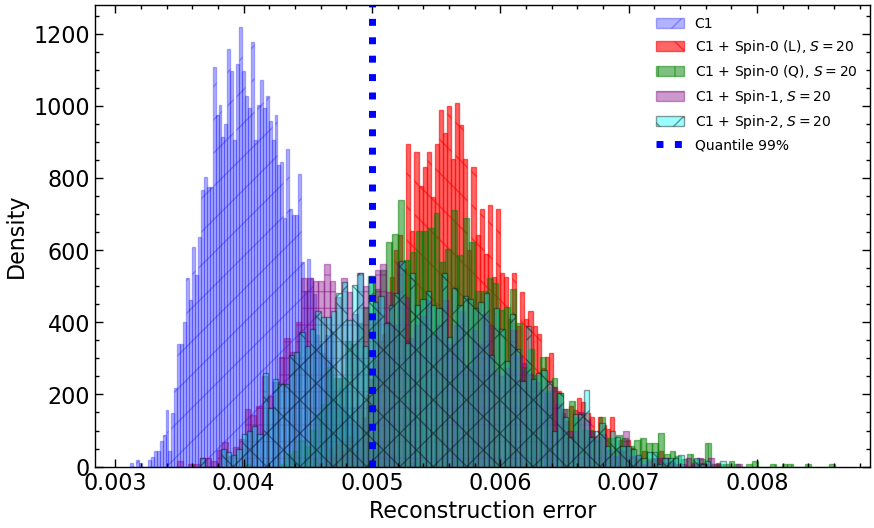

In [165]:
plt.figure(figsize = (10, 6))

plt.hist(losses_C1_example, color = "blue", bins=100, density = True, label = "C1", alpha = 0.3, edgecolor='blue', hatch='/')
plt.hist(loss_s0l_S20_C, color = "red", bins=100, density = True, label = r"C1 + Spin-0 (L), $S = 20$", alpha = 0.6, edgecolor='red', hatch='\\')
plt.hist(loss_s0q_S20_C, color = "green", bins=100, density = True, label = r"C1 + Spin-0 (Q), $S = 20$", alpha = 0.5,  edgecolor='green', hatch='|')
plt.hist(loss_s1_S20_C, color = "purple", bins=100, density = True, label = r"C1 + Spin-1, $S = 20$", alpha = 0.4, edgecolor='purple', hatch='-')
plt.hist(loss_s2_S20_C, color = "cyan", bins=100, density = True, label = r"C1 + Spin-2, $S = 20$", alpha = 0.4, edgecolor='black', hatch='x')

plt.axvline(x=threshold_C1, color='blue', linestyle=':', linewidth=5, label="Quantile 99%")

plt.xlabel("Reconstruction error")
plt.ylabel("Density")
plt.legend(loc = 'upper right', ncol = 1, fontsize = 10)
plt.savefig("store/plots/autoencoder_experimental/loss_distributions_various_models_fixed_snr.png")
plt.show()

In [167]:
data = {
    'losses_C1_example': losses_C1_example.numpy(),
    'loss_s0l_S20_C': loss_s0l_S20_C,
    'loss_s0q_S20_C': loss_s0q_S20_C,
    'loss_s1_S20_C': loss_s1_S20_C,
    'loss_s2_S20_C': loss_s2_S20_C
}

# Save to a pickle file
with open('store/files/autoencoder_experimental/loss_distributions_allspins_S20_C.pkl', 'wb') as f:
    pickle.dump(data, f)